In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

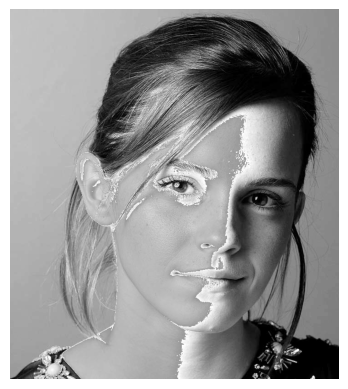

In [7]:
# Define the piecewise linear intensity transformation
def intensity_transform(value):
    if value <= 50:
        return int(2 * value)  
    elif 50 < value <= 150:
        return int(100+(value-50)*(155/100))
    else:
        return int(150+(value-150)*1)  

# Vectorize the function
v_intensity_transform = np.vectorize(intensity_transform)

image = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

transformed_image = v_intensity_transform(image)
transformed_image = transformed_image.astype('uint8')

plt.imshow(transformed_image,cmap='gray')
plt.axis('off')
plt.show()


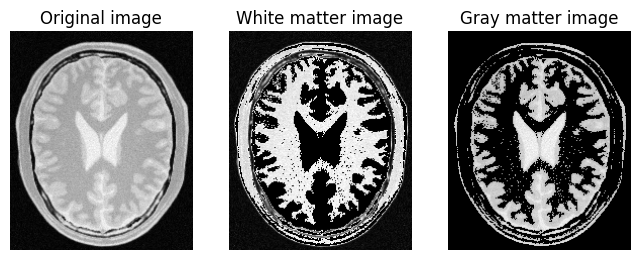

In [35]:
# Define the piecewise linear intensity transformation for white matter
def gray_matter_transform(value):
    if value >=181:
        return int(value)  
    else:
        return 0  

# Define the piecewise linear intensity transformation for gray matter
def white_matter_transform(value):
    if value <= 180:
        return int(value)  
    else:
        return 0  
    
# Vectorize the functions
v_white_matter_transform = np.vectorize(white_matter_transform)
v_gray_matter_transform = np.vectorize(gray_matter_transform)

image = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

#Apply transformations
white_matter_image = v_white_matter_transform(image)
gray_matter_image = v_gray_matter_transform(image)

white_matter_image = white_matter_image.astype(np.uint8)
gray_matter_image = gray_matter_image.astype(np.uint8)

fig , ax = plt.subplots(1,3,figsize=(8,8))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(white_matter_image,cmap='gray')
ax[1].set_title('White matter image')
ax[2].imshow(gray_matter_image,cmap='gray')
ax[2].set_title('Gray matter image')

for a in ax:
    a.axis('off')

plt.show()


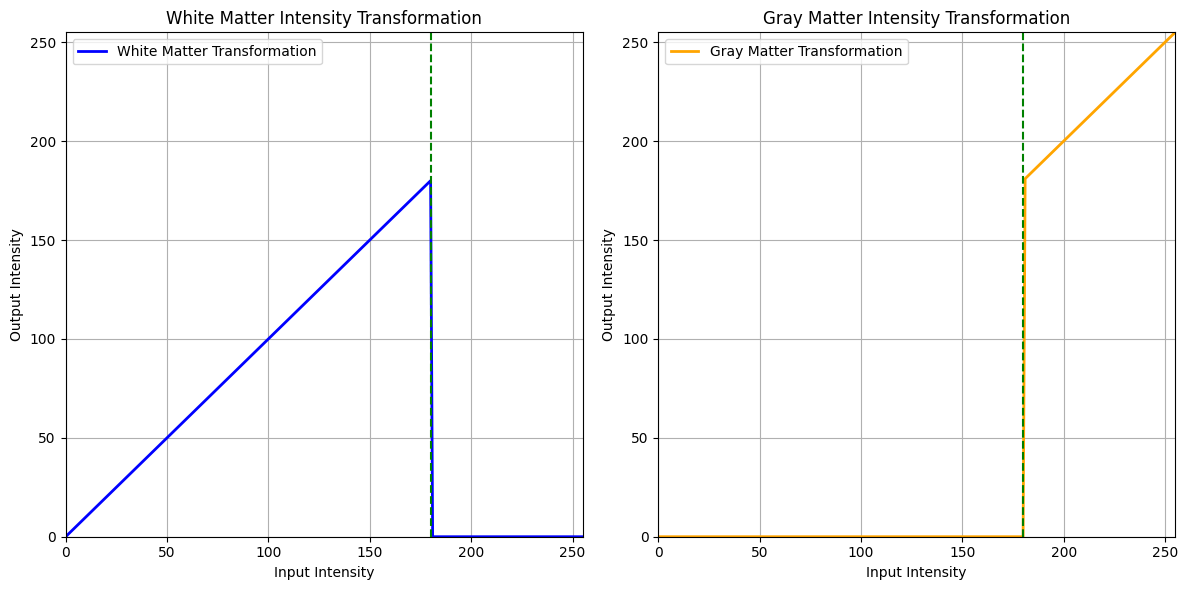

In [34]:
input_intensities = np.arange(256)

white_matter_output = v_white_matter_transform(input_intensities)
gray_matter_output = v_gray_matter_transform(input_intensities)

plt.figure(figsize=(12, 6))

# White Matter Transformation
plt.subplot(1, 2, 1)
plt.plot(input_intensities, white_matter_output, color='blue', label='White Matter Transformation', linewidth=2)
plt.title('White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid()
plt.axvline(180, color='green', linestyle='--')
plt.legend()

# Gray Matter Transformation
plt.subplot(1, 2, 2)
plt.plot(input_intensities, gray_matter_output, color='orange', label='Gray Matter Transformation', linewidth=2)
plt.title('Gray Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid()
plt.legend()
plt.axvline(180, color='green', linestyle='--')
plt.tight_layout()
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\g'
<>:29: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Sahan\AppData\Local\Temp\ipykernel_41220\1361387798.py:29: SyntaxWarning: invalid escape sequence '\g'
  ax[1].set_title(f'Transformed with $\gamma$ = {gamma}')


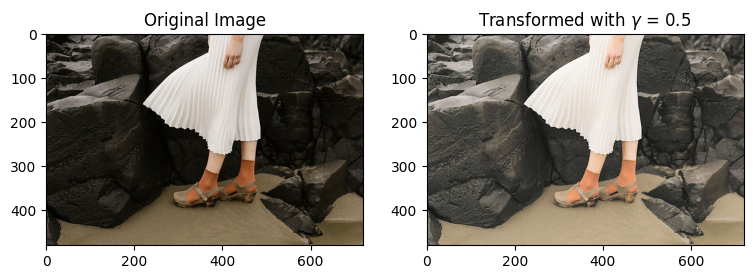

In [46]:
import cv2 as cv
import numpy as np

img = cv.imread('highlights_and_shadows.jpg')

# Convert RGB image to LAB color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Split into L, A, and B channels
L, A, B = cv.split(lab_img)


gamma = 0.5

t1 = np.array([(i/255)**gamma*255 for i in range(256)],dtype=np.uint8)
L_gamma_corrected = cv.LUT(L,t1)

# Merge the corrected L channel with the original A and B channels
lab_gamma_corrected = cv.merge((L_gamma_corrected, A, B))

# Convert back to RGB color space
gamma_corrected_img = cv.cvtColor(lab_gamma_corrected, cv.COLOR_LAB2BGR)


fig,ax = plt.subplots(1,2,figsize=(9,12))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(gamma_corrected_img,cv.COLOR_BGR2RGB))
ax[1].set_title(f'Transformed with $\gamma$ = {gamma}')


plt.show()

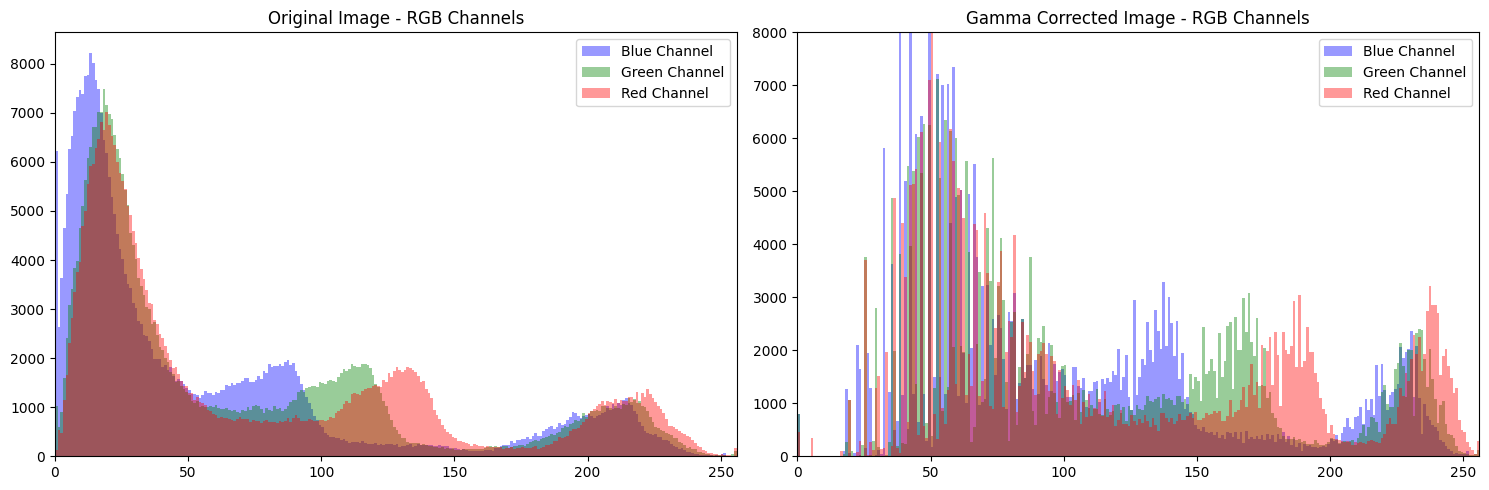

In [51]:
# Create subplots for original and gamma corrected image histograms
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Original image histograms (Red, Green, Blue in the same plot)
axs[0].set_title("Original Image - RGB Channels")
axs[0].hist(img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[0].hist(img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[0].hist(img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma corrected image histograms (Red, Green, Blue in the same plot)
axs[1].set_title("Gamma Corrected Image - RGB Channels")
axs[1].hist(gamma_corrected_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(gamma_corrected_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(gamma_corrected_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  
axs[1].legend()


plt.tight_layout()
plt.show()

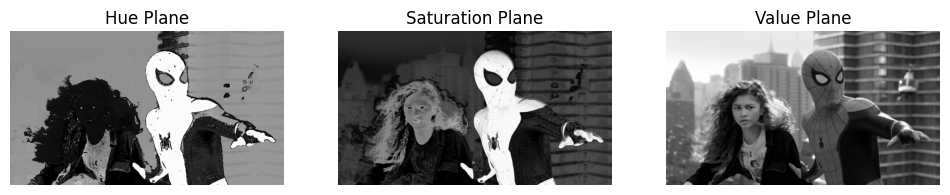

In [97]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format
spiderman_image = cv2.imread('spider.png')

# Convert the image to HSV
hsv_image = cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2HSV)

# Split the HSV image into three planes: H, S, V
hue, saturation, value = cv2.split(hsv_image)


fig , ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(hue,cmap='gray')
ax[0].set_title('Hue Plane')
ax[1].imshow(saturation,cmap='gray')
ax[1].set_title('Saturation Plane')
ax[2].imshow(value,cmap='gray')
ax[2].set_title('Value Plane')

for a in ax:
    a.axis('off')

plt.show()


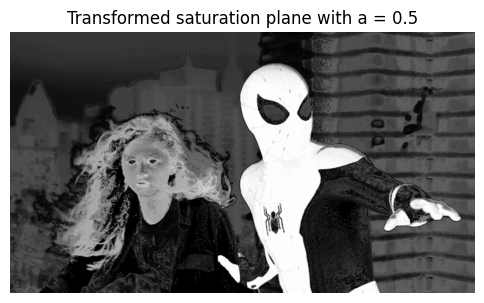

In [98]:
def transform(value,a):# a is between 0 and 1
    sigma = 70
    calc_value = value + a*128*np.exp(-(value-128)**2/(2*sigma**2))
    trans_value = min(calc_value,255)
    return  trans_value

transform_vector = np.vectorize(transform)


transformed_saturation_plane = transform_vector(saturation,0.5)

transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)

plt.figure(figsize=(6,8))
plt.imshow(transformed_saturation_plane,cmap='gray')
plt.title('Transformed saturation plane with a = 0.5')
plt.axis('off')
plt.show()


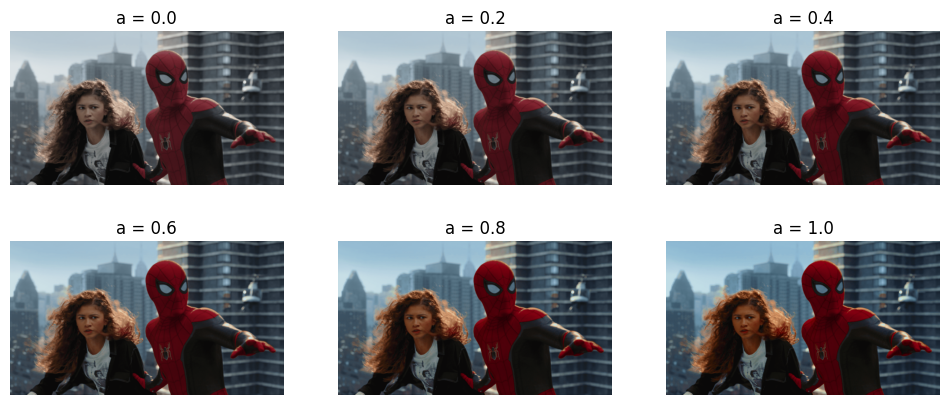

In [99]:
a_values = np.linspace(0,1,6)
fig , ax = plt.subplots(2,3,figsize=(12,5))
for i in range(6):
    a = round(a_values[i],1)
    
    transformed_saturation_plane = transform_vector(saturation,a)
    transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)
    hsv_image_recombined = cv2.merge([hue, transformed_saturation_plane, value])
    bgr_image = cv2.cvtColor(hsv_image_recombined, cv2.COLOR_HSV2RGB)
    row = i//3
    col = i%3
    ax[row][col].imshow(bgr_image)
    ax[row][col].set_title(f'a = {a}')
    ax[row][col].axis('off')

plt.show()
    
    

Desired value for a = 0.6

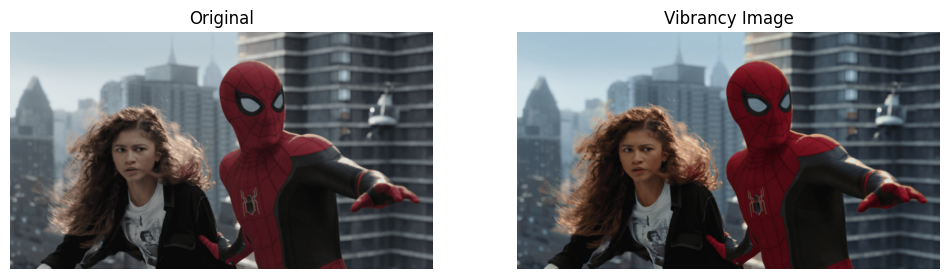

In [104]:
a = 0.4
transformed_saturation_plane = transform_vector(saturation,a)
transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)
hsv_image_recombined = cv2.merge([hue, transformed_saturation_plane, value])
bgr_image = cv2.cvtColor(hsv_image_recombined, cv2.COLOR_HSV2RGB)


fig , ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(bgr_image)
ax[1].set_title('Vibrancy Image')

for a in ax:
    a.axis('off')

plt.show()

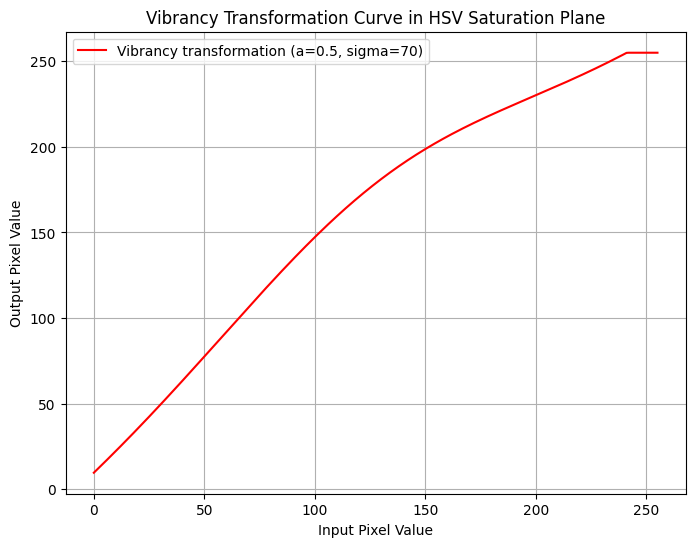

In [105]:
input_values = np.arange(0, 256)

# Output values
output_values = [transform(x, 0.4) for x in input_values]

# Plot the transformation
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label='Vibrancy transformation (a=0.5, sigma=70)', color='red')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.title('Vibrancy Transformation Curve in HSV Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()

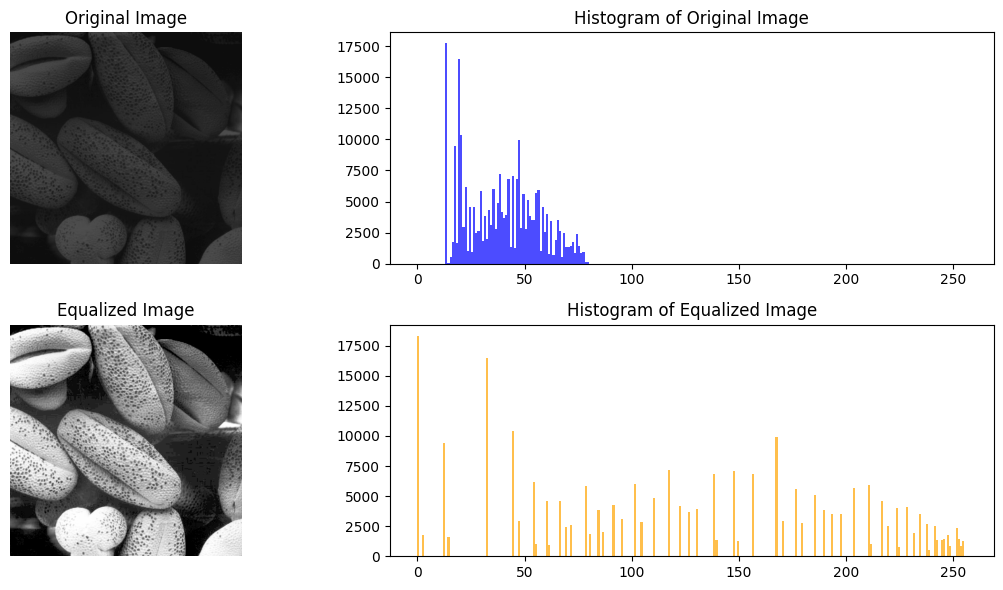

In [107]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for histogram equalization
def histogram_equalization(img):
    # Step 1: Compute the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Masking to ignore pixels with zero intensity (if any)
    cdf_masked = np.ma.masked_equal(cdf, 0)

    # Step 3: Normalize the CDF to fit the range 0-255
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())

    # Fill the masked values in the CDF (for zero intensity pixels)
    cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')

    # Step 4: Map the original intensities to equalized intensities using the CDF
    img_equalized = cdf_final[img]

    return img_equalized

# Load the image
shells = cv2.imread('shells.tif', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = histogram_equalization(shells)

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(shells, cmap='gray',vmin=0,vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(shells.flatten(), bins=256, range=[0,256], color='blue', alpha=0.7)
plt.title('Histogram of Original Image')

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray',vmin=0,vmax=255)
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=[0,256], color='orange', alpha=0.7)
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()
